# Métodos de Clustering
Vamos ver algumas métodos de clustering implementados nos packages dop Python.

**Imports**

In [14]:
# Clustering com kmeans
# temos de fornecer o valor de k (#clusters)
from sklearn.cluster import KMeans
from matplotlib.lines import Line2D
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.mixture import GaussianMixture
from sklearn.cluster import DBSCAN
import numpy as np
from scipy.cluster.hierarchy import dendrogram, linkage
from sklearn.cluster import AgglomerativeClustering

**Ler Dados**

In [15]:
file_name = 'datasHS.csv'
data = pd.read_csv(file_name)
data['Program'] = data[' Program'].map(lambda x: x.replace(" ",""))
data['CPU'] = data[' Core(s)']
data['PKG'] = data[' Package']
data['Time'] = data[' Time (ms)']
data.drop([' Program', ' GPU', ' DRAM', ' Core(s)', ' Package', ' Time (ms)',' Temperature',' Memory'],axis=1,inplace=True)
data.columns

Index(['Language', ' PowerLimit', 'Program', 'CPU', 'PKG', 'Time'], dtype='object')

**Agrupar Dados**

In [16]:
data["Label"] = data["Program"] + " " + data["Language"] + " " + data[' PowerLimit'].map(lambda x: str(x))
data.drop(["Program","Language",' PowerLimit'],axis=1,inplace=True)
data

,CPU,PKG,Time,Label
0,7270.968872,8744.438110,660940.0,NoFib Haskell -1
1,7266.376099,8738.839783,661363.0,NoFib Haskell -1
2,7277.413696,8748.695740,660991.0,NoFib Haskell -1
3,7273.864746,8747.987122,661450.0,NoFib Haskell -1
4,7272.566101,8746.436829,661220.0,NoFib Haskell -1
5,7280.157776,8751.901001,660799.0,NoFib Haskell -1
6,7284.493652,8757.206848,660347.0,NoFib Haskell -1
7,7276.179443,8749.497559,661146.0,NoFib Haskell -1
8,7276.283997,8750.505920,661480.0,NoFib Haskell -1
9,7273.963318,8749.065979,661273.0,NoFib Haskell -1


C:\Users\Clinica\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


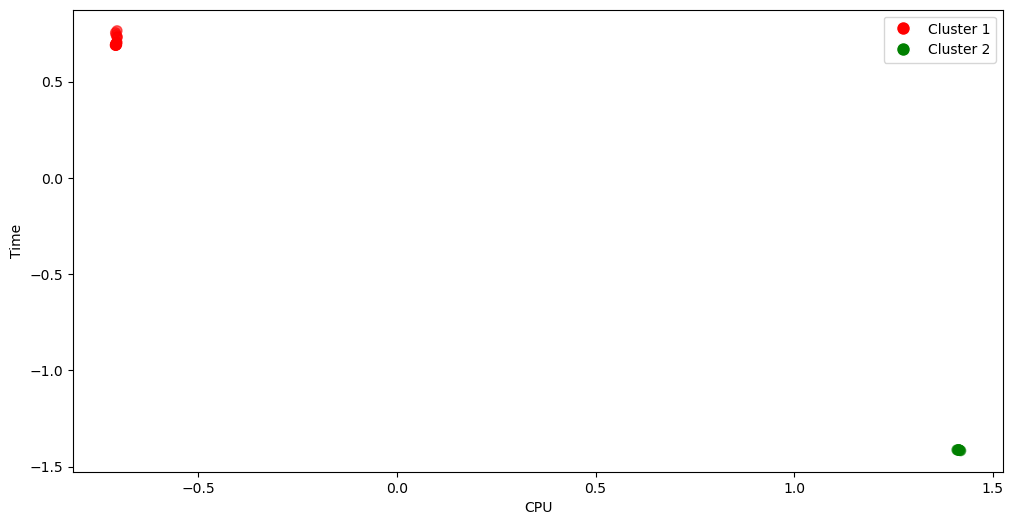

In [28]:
import matplotlib.pyplot as plt
from matplotlib.lines import Line2D
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
import pandas as pd

def k_means(clusters):
    df = data.drop(["Label"], axis=1).copy()
    
    # Normalize the data
    scaler = StandardScaler()
    df_scaled = pd.DataFrame(scaler.fit_transform(df), columns=df.columns)
    
    kmeans = KMeans(n_clusters=clusters, random_state=0, n_init='auto')
    df_scaled['cluster'] = kmeans.fit_predict(df_scaled)
    centroids = kmeans.cluster_centers_
    
    # Plot the results
    colors = ['red', 'green', 'cyan', 'blue', 'yellow', 'black']
    df_scaled['color'] = df_scaled['cluster'].map({i: colors[i] for i in range(clusters)})
    
    plt.figure(figsize=(12, 6))
    plt.scatter(df_scaled['CPU'], df_scaled['Time'], c=df_scaled['color'], s=50, alpha=0.6)
    
    
    # Create legend elements
    legend_elements = [Line2D([0], [0], marker='o', color='w', label=f'Cluster {i+1}', 
                              markerfacecolor=colors[i], markersize=10) for i in range(clusters)]
    
    # Plot legend
    plt.legend(handles=legend_elements, loc='upper right')
    
    # Title and labels
    plt.xlabel('CPU')
    plt.ylabel('Time')
    
    plt.show()

    
k_means(2)

C:\Users\Clinica\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


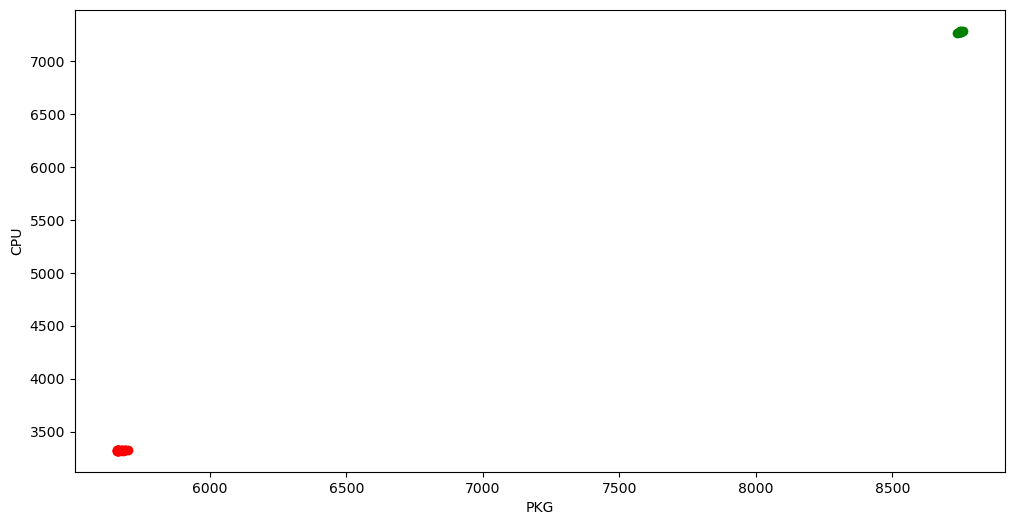

In [29]:
def gaussian_mixture(components):
    df = data.drop(["Label"], axis=1).copy()
    if df.shape[0] < components:
        raise ValueError(f"Number of components ({components}) cannot be greater than number of samples ({df.shape[0]}).")
    
    gmm = GaussianMixture(n_components=components)
    labels = gmm.fit_predict(df)
    frame = df.copy()
    frame['cluster'] = labels
    colors = ['red', 'green', 'cyan', 'blue', 'yellow', 'black']
    plt.figure(figsize=(12, 6))
    for k in range(0, components):
        cluster_df = frame[frame["cluster"] == k]
        plt.scatter(cluster_df["PKG"], cluster_df["CPU"], c=colors[k])

    plt.xlabel('PKG')
    plt.ylabel('CPU')
    plt.show()
    
gaussian_mixture(2)


Estimated number of clusters: 2
Estimated number of noise points: 0


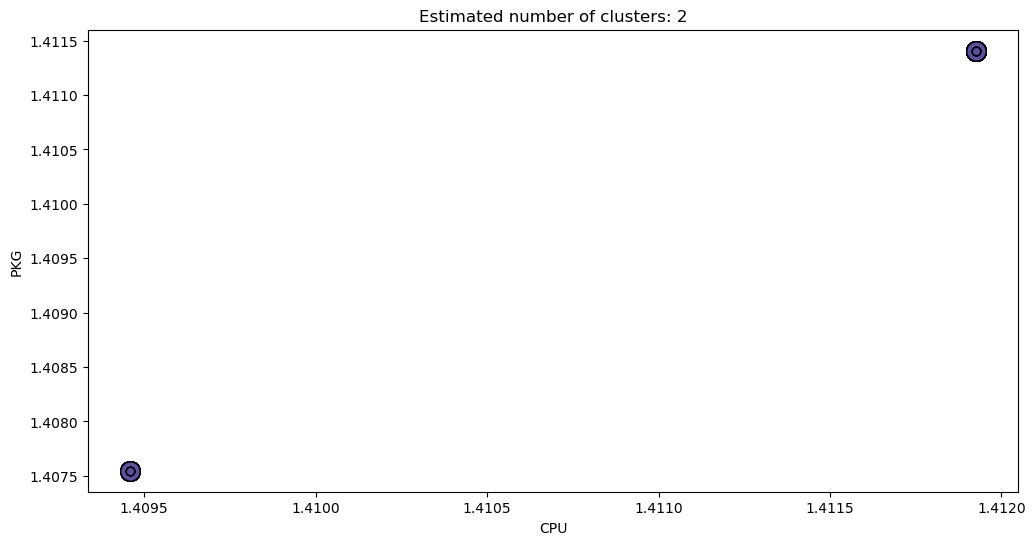

In [27]:
# Exemplo de uso do DBSCAN

def dbscan():
    df = data.copy()
    df = data.drop(["Label"], axis=1)
    scaler = StandardScaler()
    df_scaled = scaler.fit_transform(df)
    
    # DBSCAN clustering
    db = DBSCAN(eps=0.5, min_samples=2).fit(df_scaled)
    labels = db.labels_
    
    # Number of clusters in labels, ignoring noise if present.
    n_clusters_ = len(set(labels)) - (1 if -1 in labels else 0)
    n_noise_ = list(labels).count(-1)
    
    print("Estimated number of clusters: %d" % n_clusters_)
    print("Estimated number of noise points: %d" % n_noise_)
    
    # Plotting the results
    plt.figure(figsize=(12, 6))
    unique_labels = set(labels)
    colors = [plt.cm.Spectral(each) for each in np.linspace(0, 1, len(unique_labels))]
    
    for k, col in zip(unique_labels, colors):
        if k == -1:
            # Black used for noise.
            col = [0, 0, 0, 1]
        
        class_member_mask = (labels == k)
        
        xy = df_scaled[class_member_mask & db.core_sample_indices_]
        plt.plot(
            xy[:, 0], xy[:, 1], "o",
            markerfacecolor=tuple(col),
            markeredgecolor="k",
            markersize=14
        )
        
        xy = df_scaled[class_member_mask & ~db.core_sample_indices_]
        plt.plot(
            xy[:, 0], xy[:, 1], "o",
            markerfacecolor=tuple(col),
            markeredgecolor="k",
            markersize=6
        )
    
    plt.title(f"Estimated number of clusters: {n_clusters_}")
    plt.xlabel('CPU')
    plt.ylabel('PKG')
    plt.show()


dbscan()

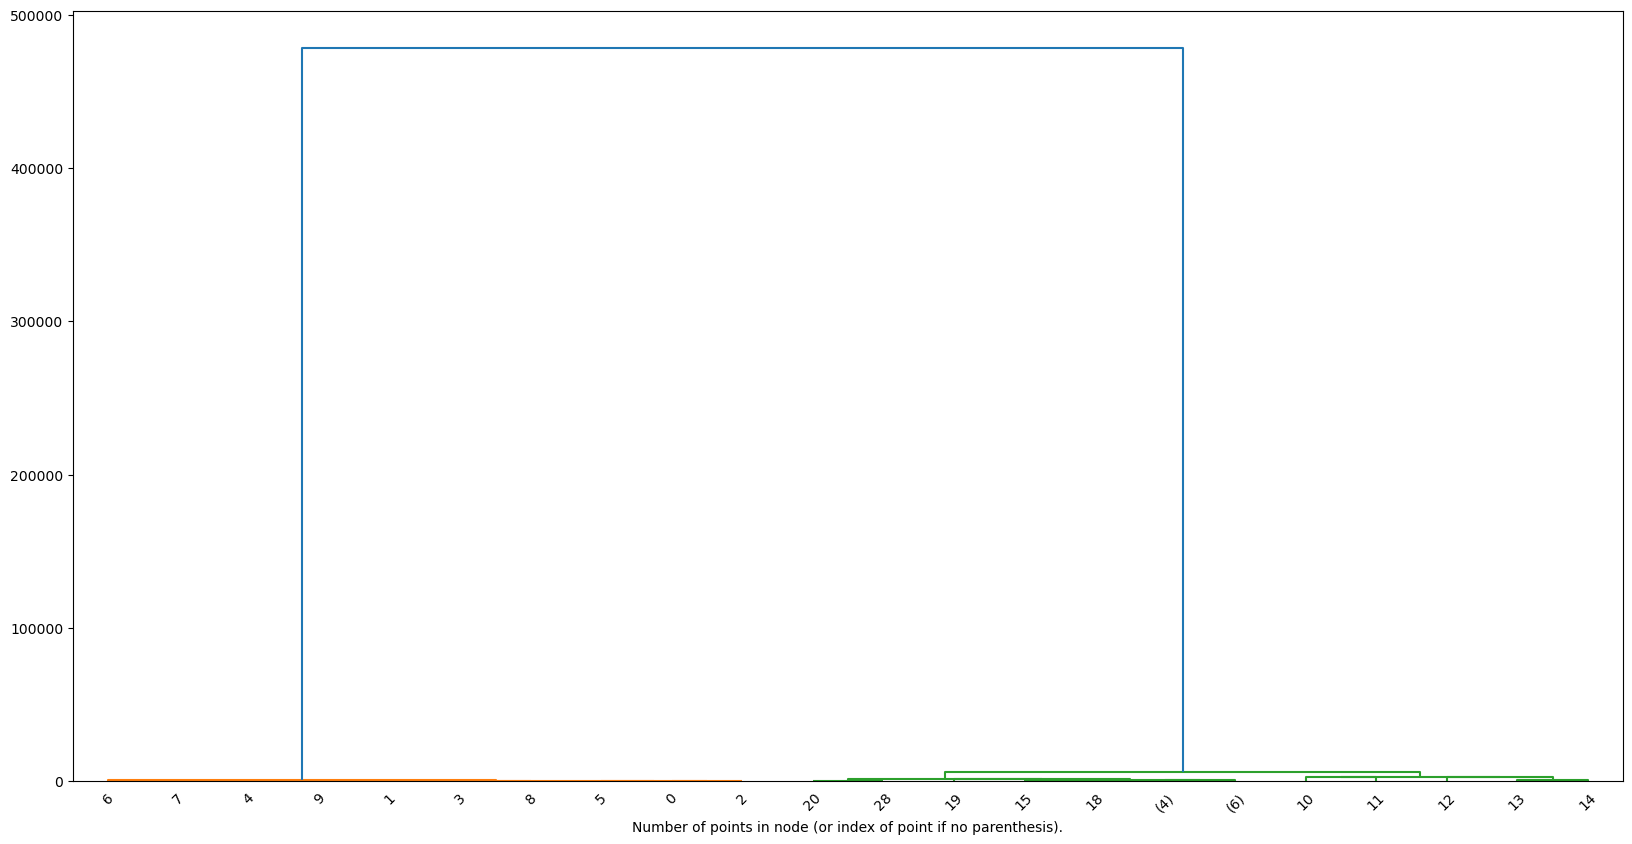

In [7]:
# Hierachical Clustering
def hierachical():
    df = data.copy()
    df.drop('Label',axis=1,inplace=True)
    link = linkage(df, method='single', metric='euclidean')
    plt.figure(figsize=(20,10))
    dendrogram(link,truncate_mode="level",p=5)
    plt.xlabel("Number of points in node (or index of point if no parenthesis).")
    plt.show()
hierachical()

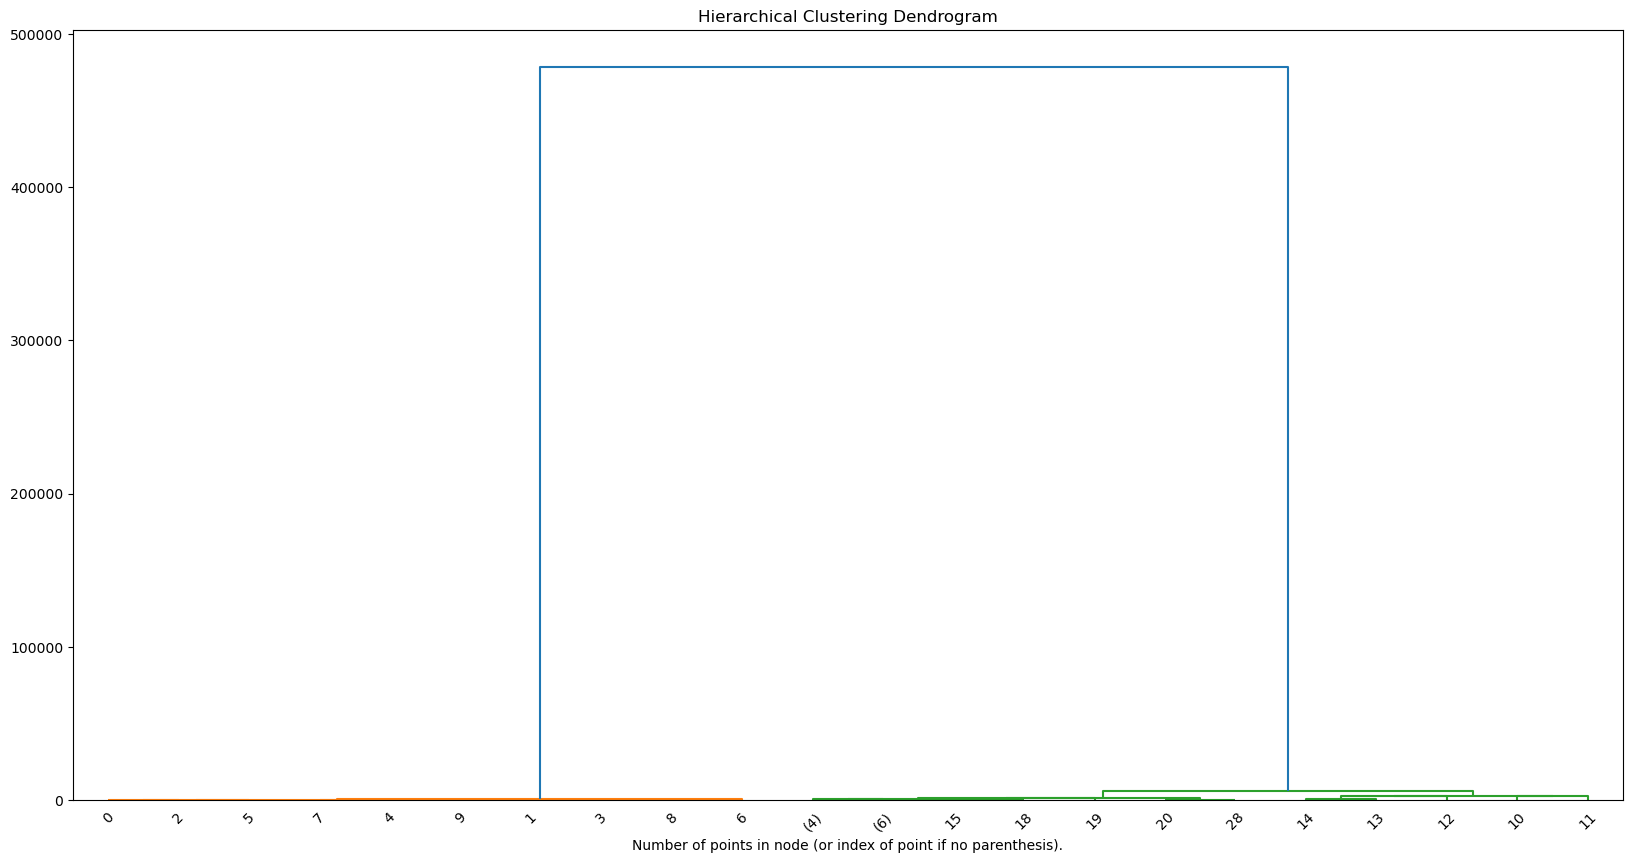

In [8]:
# Agglomerative Clustering (bottom-up construction)
def plot_dendrogram(model, **kwargs):
    counts = np.zeros(model.children_.shape[0])
    n_samples = len(model.labels_)
    for i, merge in enumerate(model.children_):
        current_count = 0
        for child_idx in merge:
            if child_idx < n_samples:
                current_count += 1  # leaf node
            else:
                current_count += counts[child_idx - n_samples]
        counts[i] = current_count

    linkage_matrix = np.column_stack(
        [model.children_, model.distances_, counts]
    ).astype(float)
    dendrogram(linkage_matrix, **kwargs)

def agglomerative():
    df = data.copy()
    df.drop('Label',axis=1,inplace=True)
    clustering = AgglomerativeClustering().fit(df)
    model = AgglomerativeClustering(distance_threshold=0, n_clusters=None,linkage='single',metric='euclidean')
    model = model.fit(df)
    plt.figure(figsize=(20,10))
    plt.title("Hierarchical Clustering Dendrogram")
    plot_dendrogram(model, truncate_mode="level", p=5)
    plt.xlabel("Number of points in node (or index of point if no parenthesis).")
    plt.show()
    
agglomerative()